In [ ]:
from pathlib import Path

import numpy as np
from zanj import ZANJ

from maze_dataset import MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.benchmark.config_sweep import (
    SweepResult,
    full_percolation_analysis,
    dataset_success_fraction,
    plot_grouped,
)
from maze_dataset.benchmark.sweep_fit import sweep_fit

f:\KNC\maze-dataset\.venv\Lib\site-packages\juliacall\__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# run a basic analysis

tqdm_allowed_kwargs = {'unit_scale', 'smoothing', 'mininterval', 'lock_args', 'leave', 'gui', 'unit_divisor', 'desc', 'miniters', 'ascii', 'initial', 'total', 'file', 'nrows', 'iterable', 'disable', 'write_bytes', 'postfix', 'self', 'position', 'bar_format', 'maxinterval', 'ncols', 'delay', 'unit', 'dynamic_ncols', 'colour'}
mapped_kwargs = {'total': 3, 'desc': 'Processing 3 items'}


Processing 3 items: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]


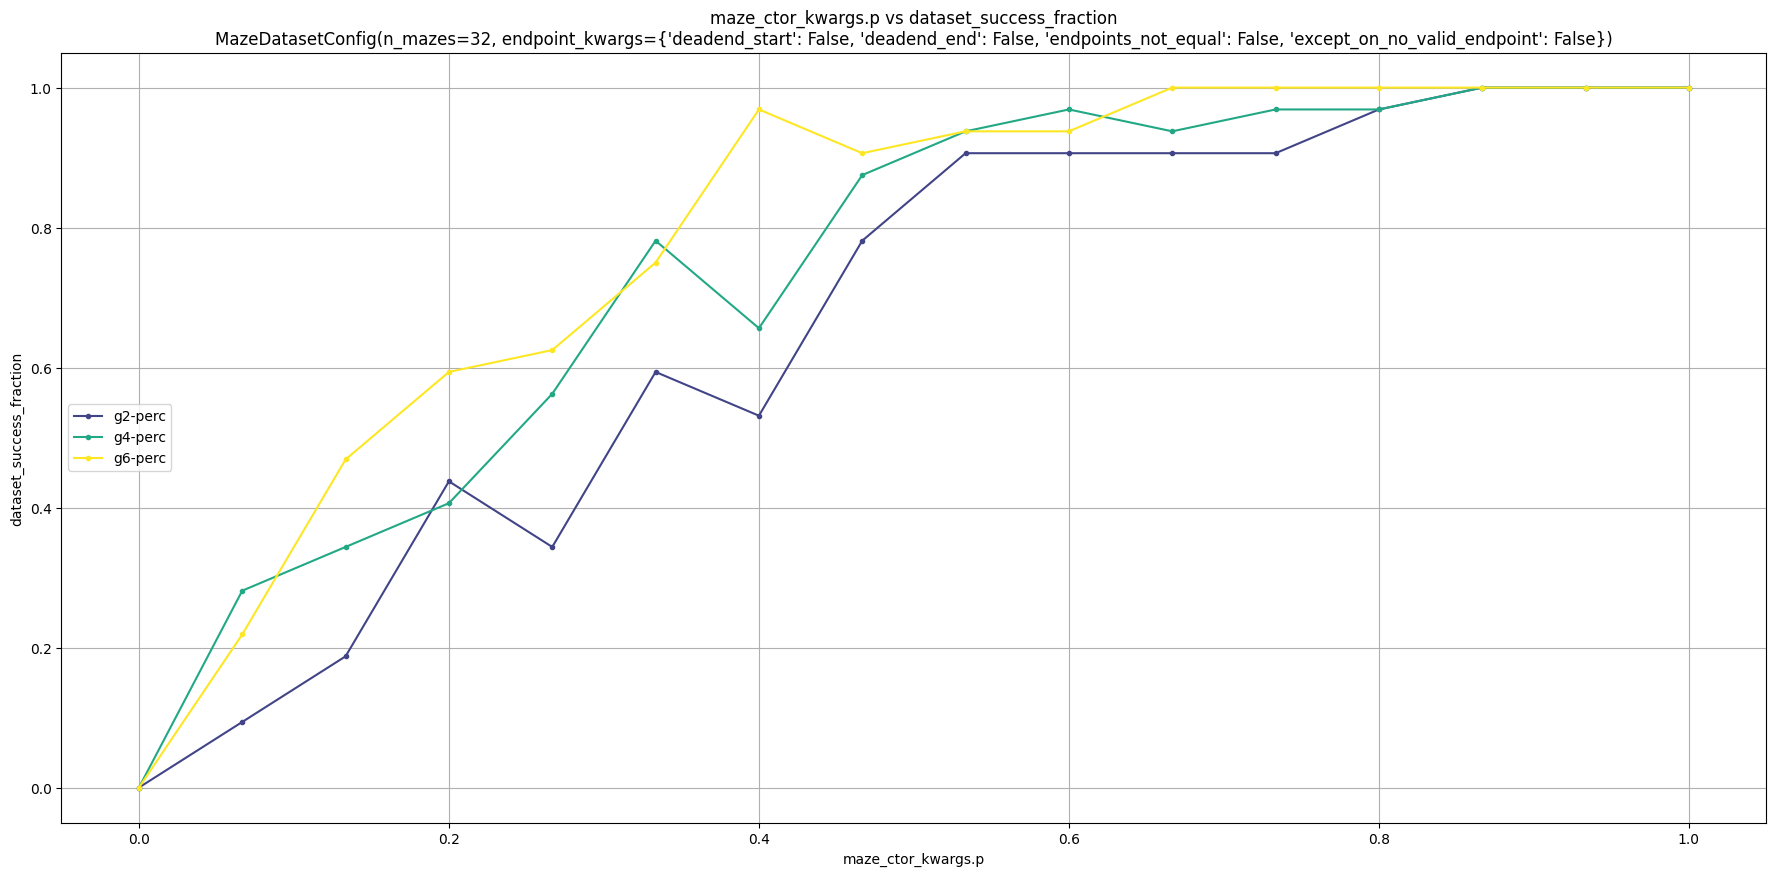

<Axes: title={'center': "maze_ctor_kwargs.p vs dataset_success_fraction\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='maze_ctor_kwargs.p', ylabel='dataset_success_fraction'>

In [2]:
# Run the analysis
results: SweepResult = SweepResult.analyze(
    configs=[
        MazeDatasetConfig(
            name=f"g{grid_n}-perc",
            grid_n=grid_n,
            n_mazes=32,
            maze_ctor=LatticeMazeGenerators.gen_percolation,
            maze_ctor_kwargs=dict(),
            endpoint_kwargs=dict(
                deadend_start=False,
                deadend_end=False,
                endpoints_not_equal=False,
                except_on_no_valid_endpoint=False,
            ),
        )
        for grid_n in [2, 4, 6]
    ],
    param_values=np.linspace(0.0, 1.0, 16).tolist(),
    param_key="maze_ctor_kwargs.p",
    analyze_func=dataset_success_fraction,
    parallel=False,
)

# Plot results
results.plot(save_path=None, cfg_keys=["n_mazes", "endpoint_kwargs"])


## check saving/loading

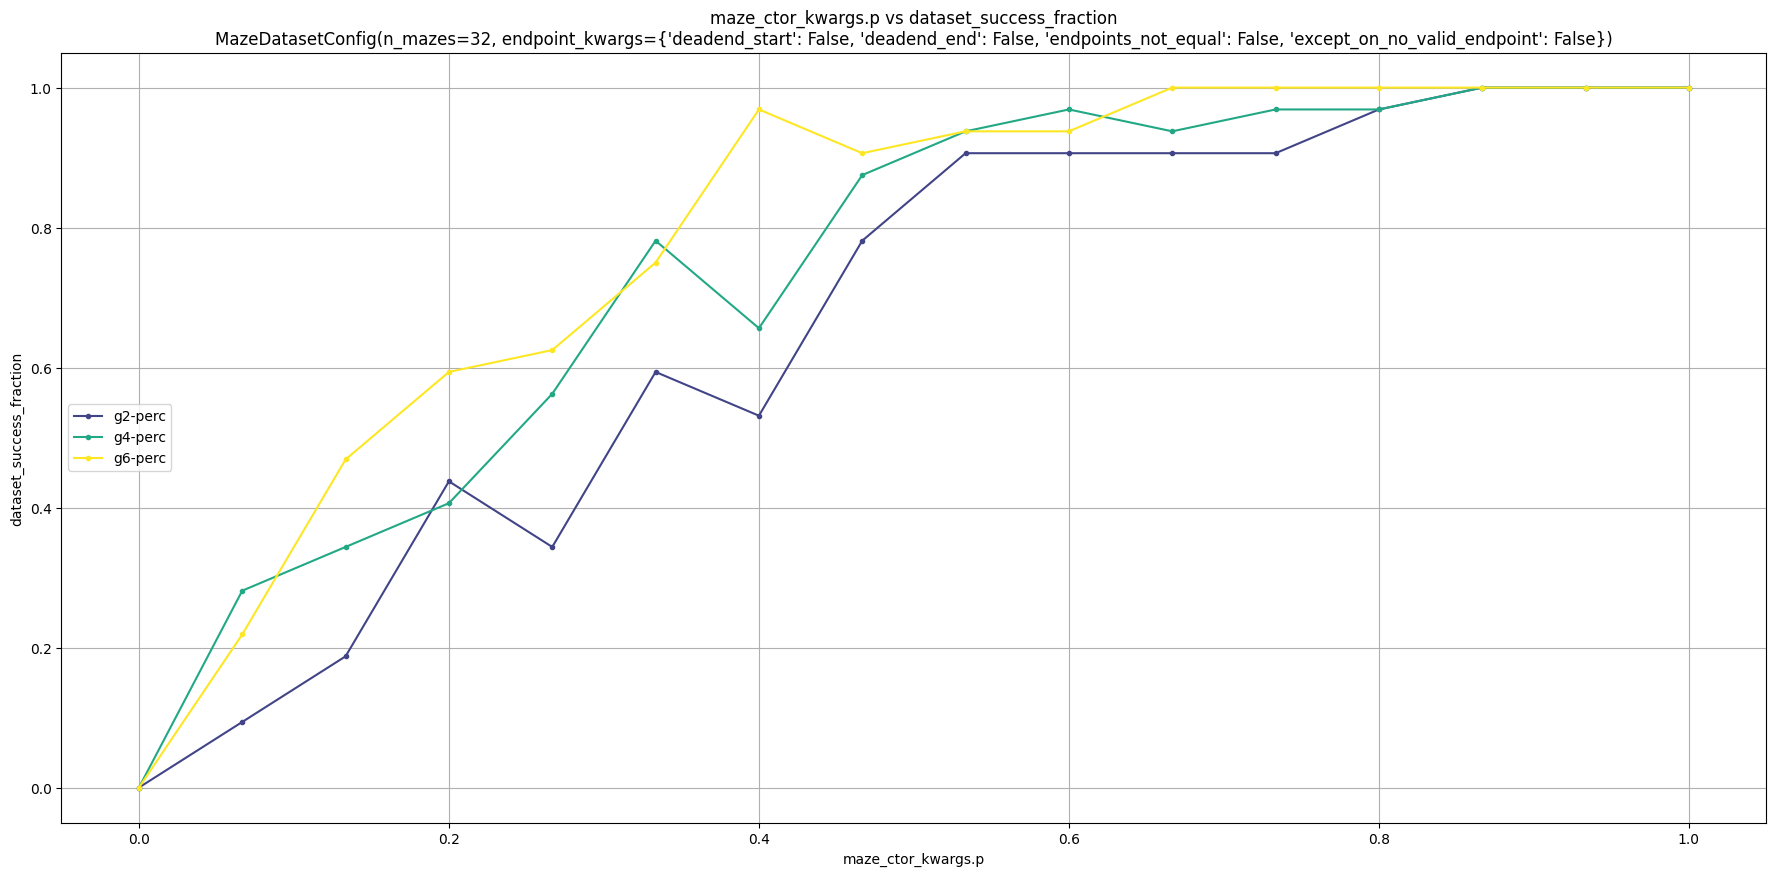

<Axes: title={'center': "maze_ctor_kwargs.p vs dataset_success_fraction\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='maze_ctor_kwargs.p', ylabel='dataset_success_fraction'>

In [3]:
path = Path("../tests/_temp/dataset_frac_sweep/results_small.zanj")
results.save(path)
ZANJ().read(path).plot(cfg_keys=["n_mazes", "endpoint_kwargs"])

# sweep acrossall endpoint kwargs and generator funcs 

In [4]:
results_sweep: SweepResult = full_percolation_analysis(
    n_mazes=16,
    p_val_count=16,
    grid_sizes=[2, 4, 6],
    parallel=False,
)

tqdm_allowed_kwargs = {'unit_scale', 'smoothing', 'mininterval', 'lock_args', 'leave', 'gui', 'unit_divisor', 'desc', 'miniters', 'ascii', 'initial', 'total', 'file', 'nrows', 'iterable', 'disable', 'write_bytes', 'postfix', 'self', 'position', 'bar_format', 'maxinterval', 'ncols', 'delay', 'unit', 'dynamic_ncols', 'colour'}
mapped_kwargs = {'total': 18, 'desc': 'Processing 18 items'}


Processing 18 items: 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Saving results to ../docs/benchmarks/percolation_fractions/result-n16-c18-p16.zanj


In [5]:
results_medium: SweepResult = SweepResult.read(
    "../docs/benchmarks/percolation_fractions/medium/result-n128-c42-p50.zanj"
    # "../docs/benchmarks/percolation_fractions/large/result-n256-c54-p100.zanj"
)

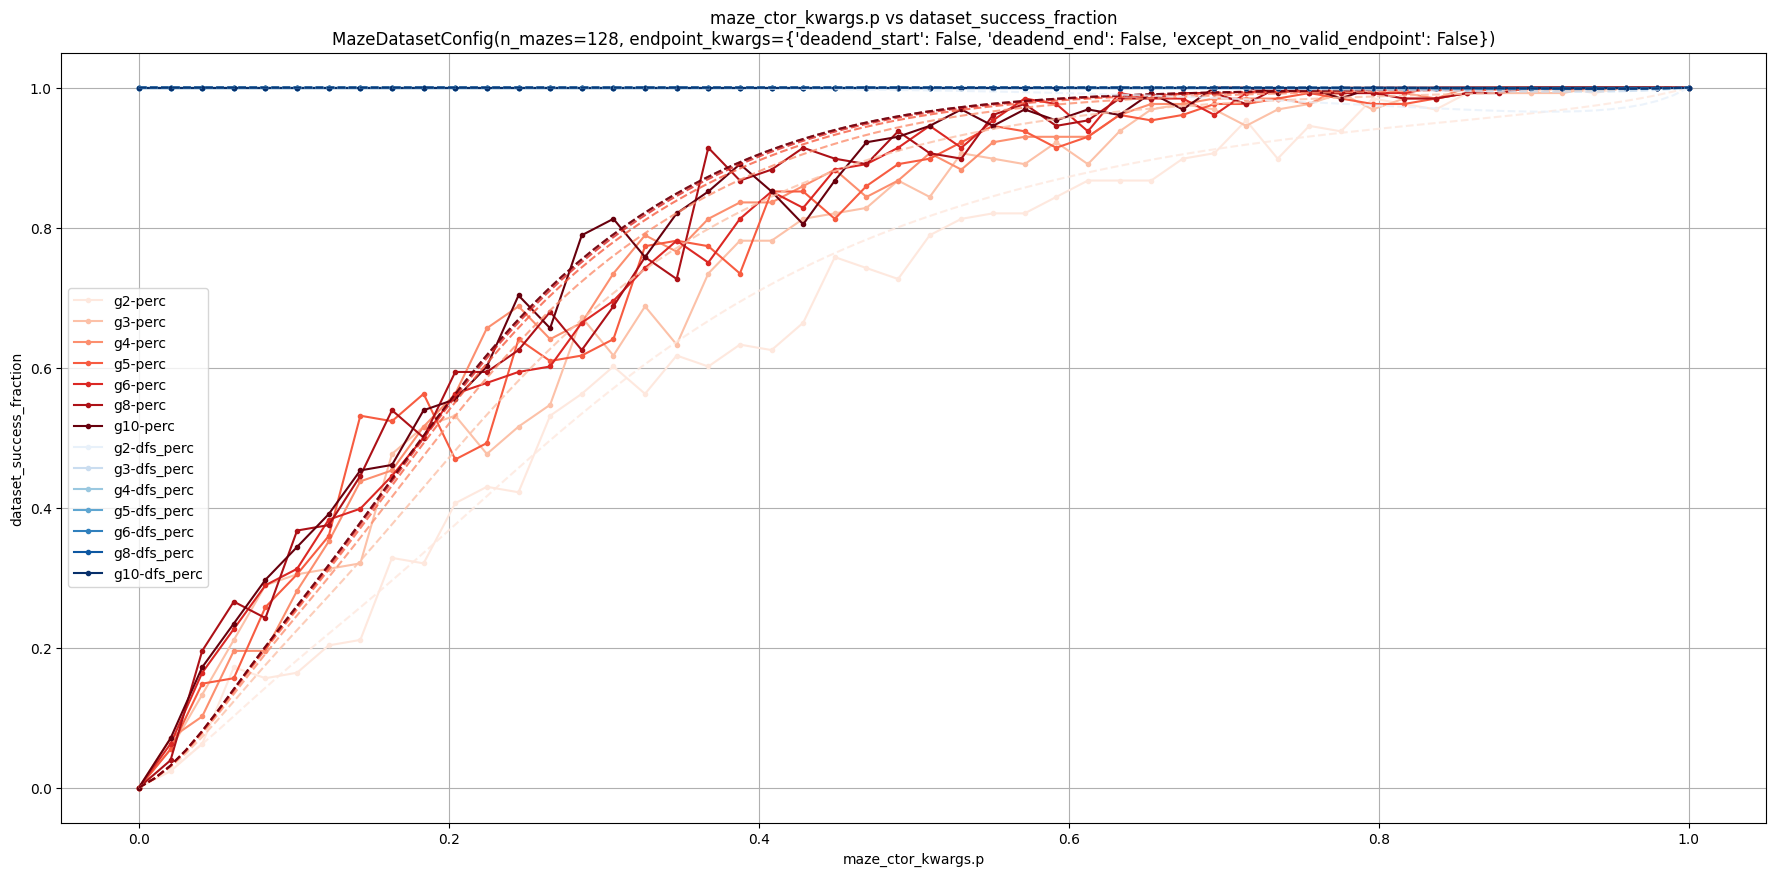

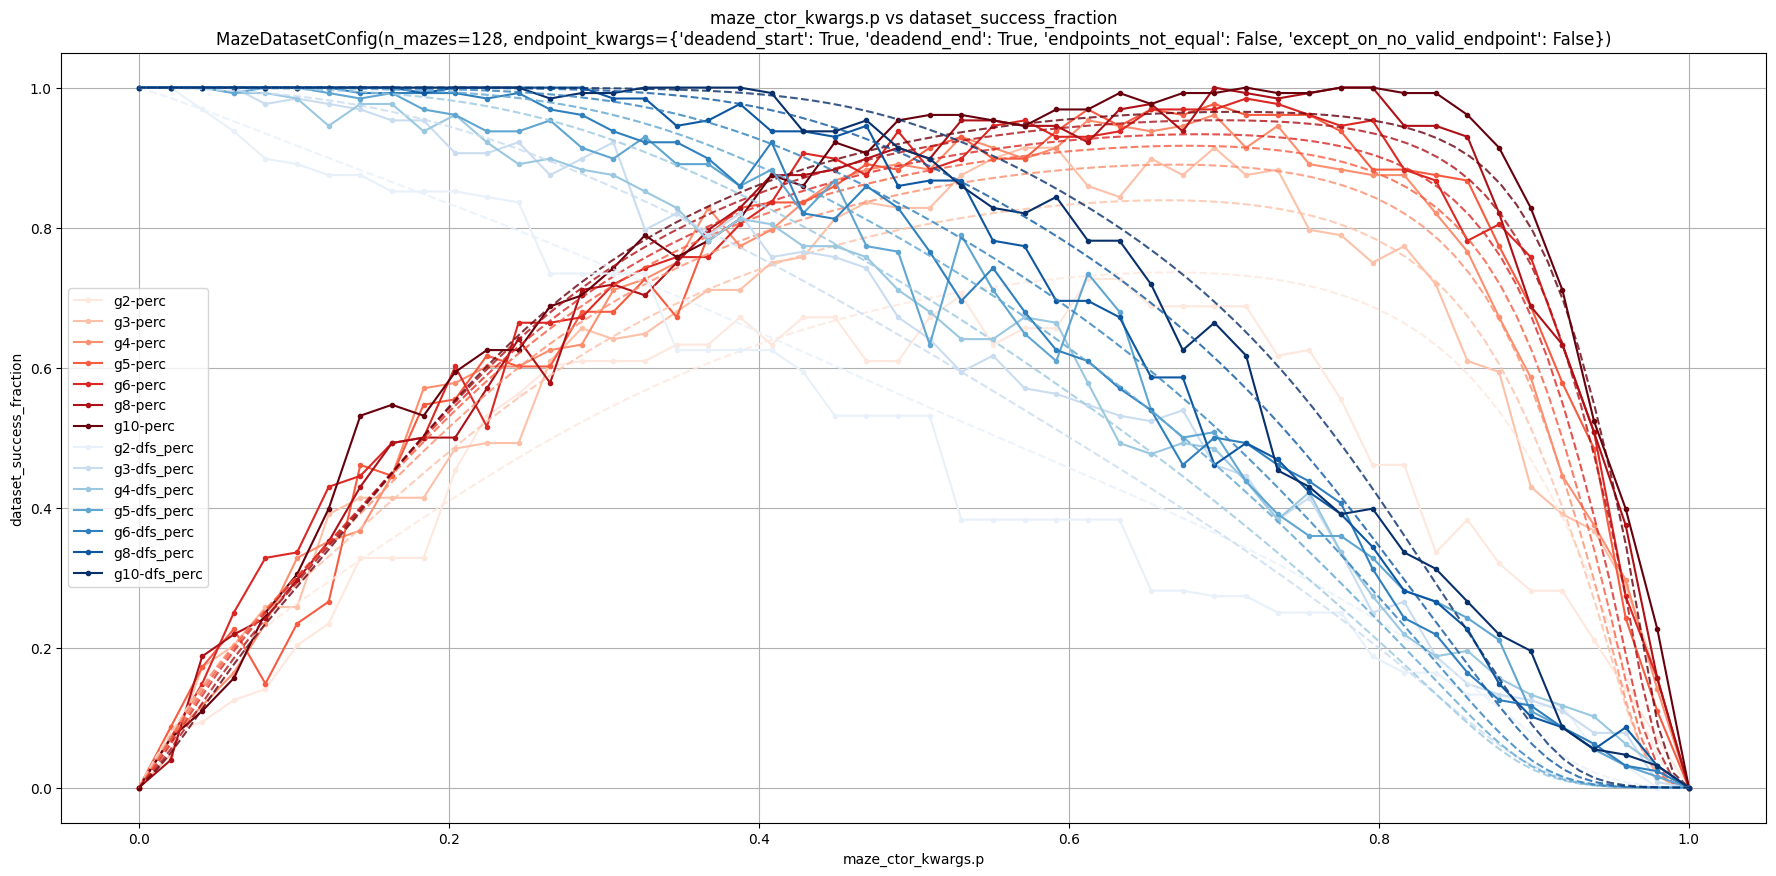

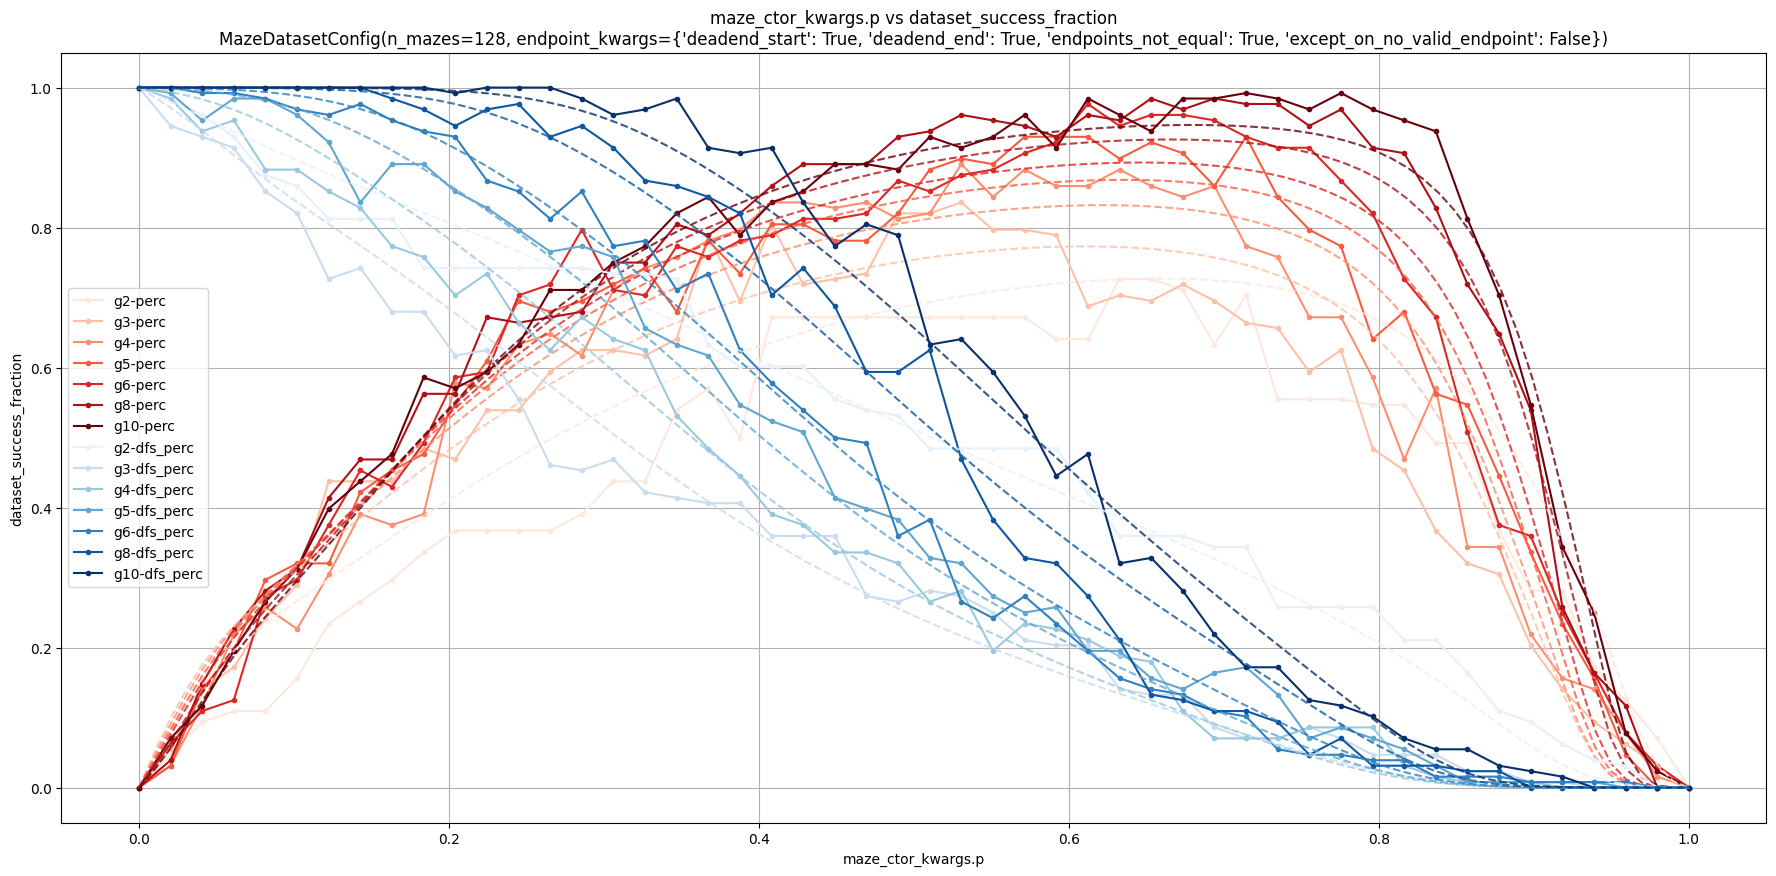

In [6]:
plot_grouped(
    results_medium,
    predict_fn=lambda x: x.success_fraction_estimate(),
    prediction_density=100,
)

# perform a pysr regression on a dataset we load

loaded data: data.summary() = {'len(configs)': 30, 'len(param_values)': 25, 'len(result_values)': 30, 'param_key': 'maze_ctor_kwargs.p', 'analyze_func': 'dataset_success_fraction'}
training data extracted: X.shape = (750, 5), y.shape = (750,)
Compiling Julia backend...


f:\KNC\maze-dataset\.venv\Lib\site-packages\pysr\sr.py:2780: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
f:\KNC\maze-dataset\.venv\Lib\site-packages\pysr\sr.py:84: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.151e-01  1.594e+01  y = 0.65073
3           9.782e-02  8.151e-02  y = 0.54285 ^ x₂
4           9.377e-02  4.223e-02  y = 1.3048 - sigmoid(x₂)
5           9.187e-02  2.049e-02  y = (0.67643 ^ x₂) + -0.13357
6           8.706e-02  5.375e-02  y = 0.84897 ^ cube(x₂ + x₀)
7           8.069e-02  7.602e-02  y = 0.67643 ^ square(x₂ + cube(x₀))
9           8.010e-02  3.668e-03  y = (sigmoid(0.035328 ^ cube(x₀)) ^ x₂) + -0.11978
10          7.734e-02  3.501e-02  y = (sigmoid(0.035328 ^ cube(square(x₀))) ^ x₂) + -0.11978
11          6.965e-02  1.048e-01  y = sigmoid(((-0.58114 ^ x₂) * square(x₀ + x₀)) + 1.2157)
12          6.889e-02  1.099e-02  y = sigmoid((square(x₀ + x₀) * (-0.58114 ^ x₂)) + sigmoid(...
                                      1.4146))
16          6.333e-02  2.102e-02  y = square(sigmoid((x₀ * exp(x₂ - 0.18419)) ^ (x₀ * ((x₄ -

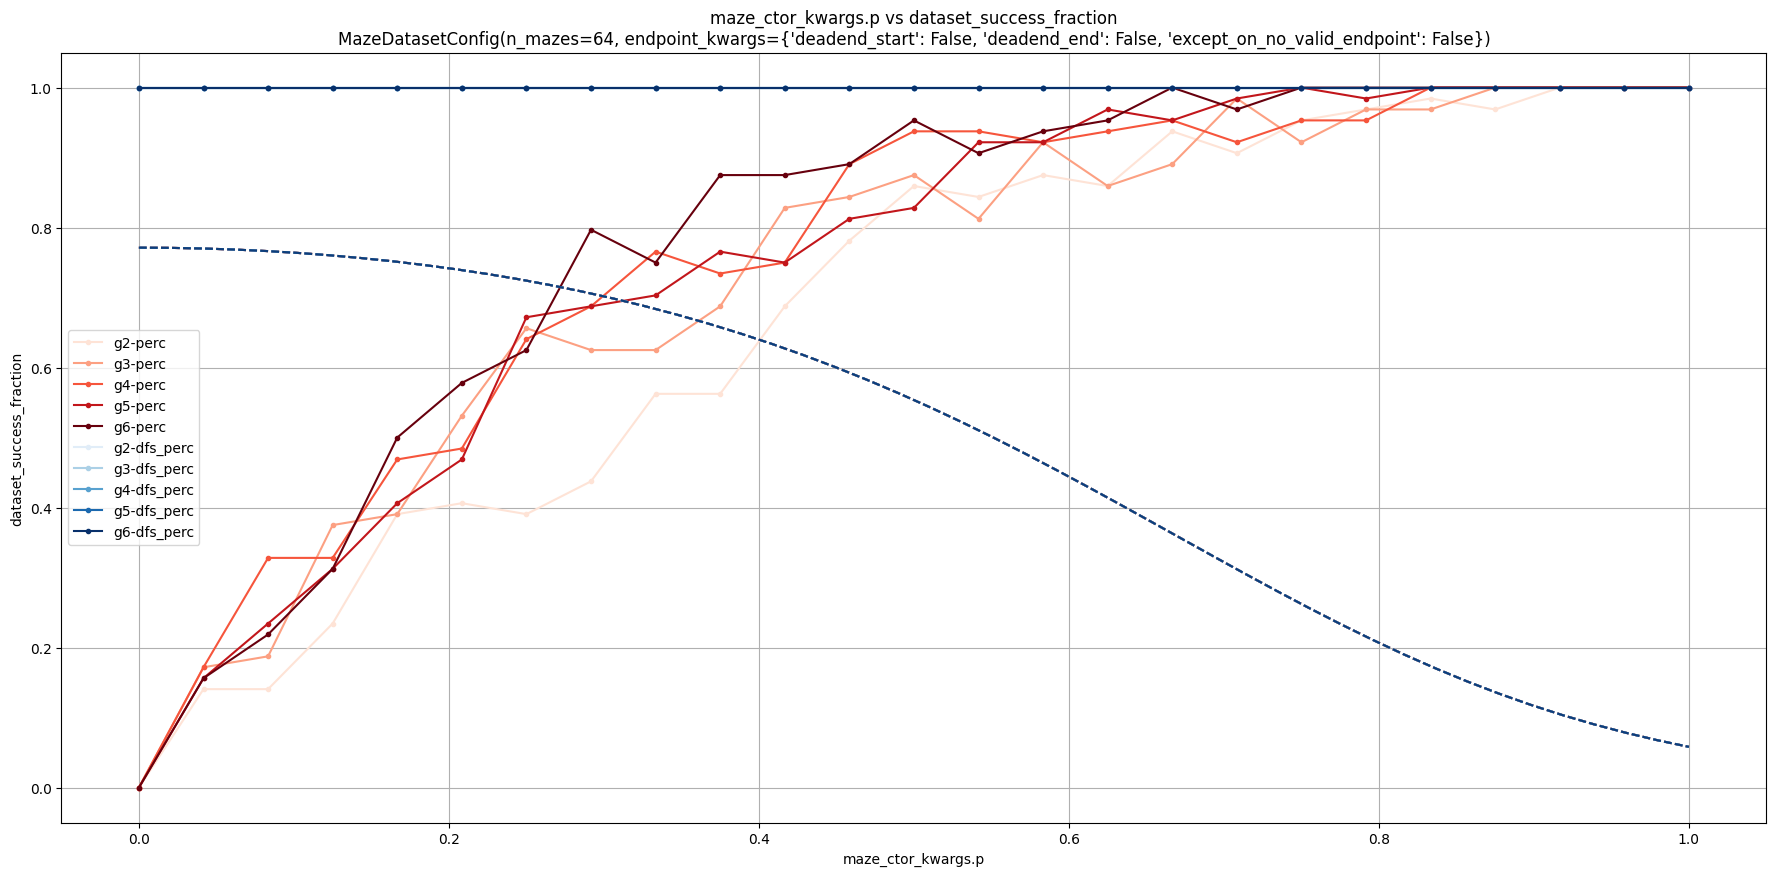

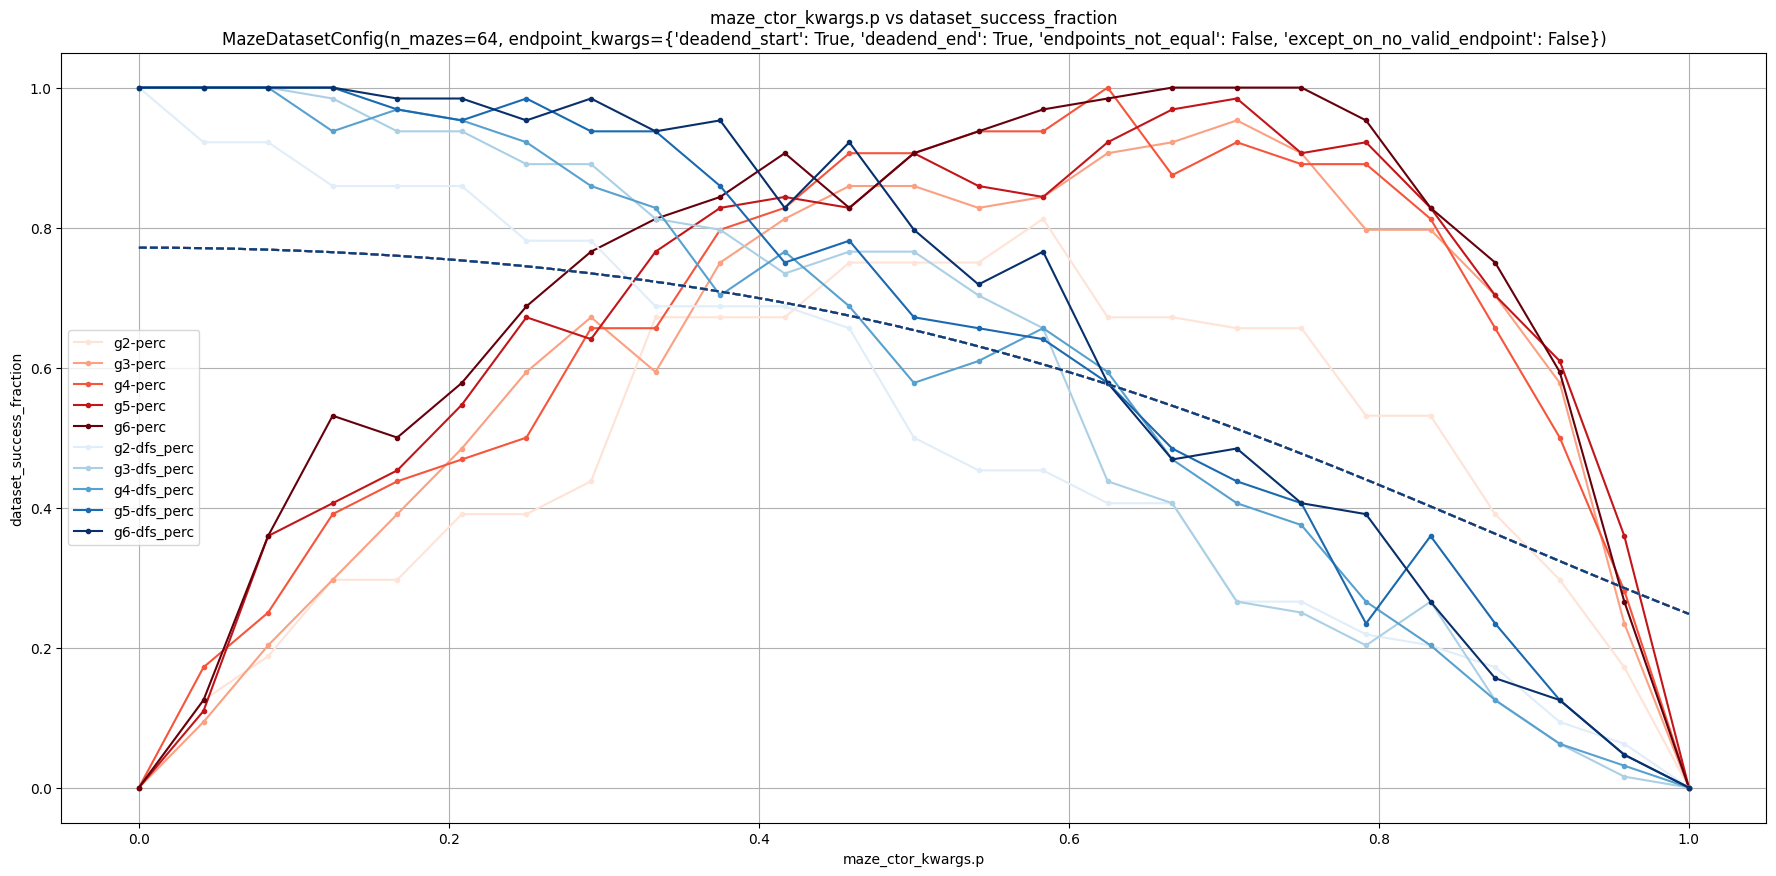

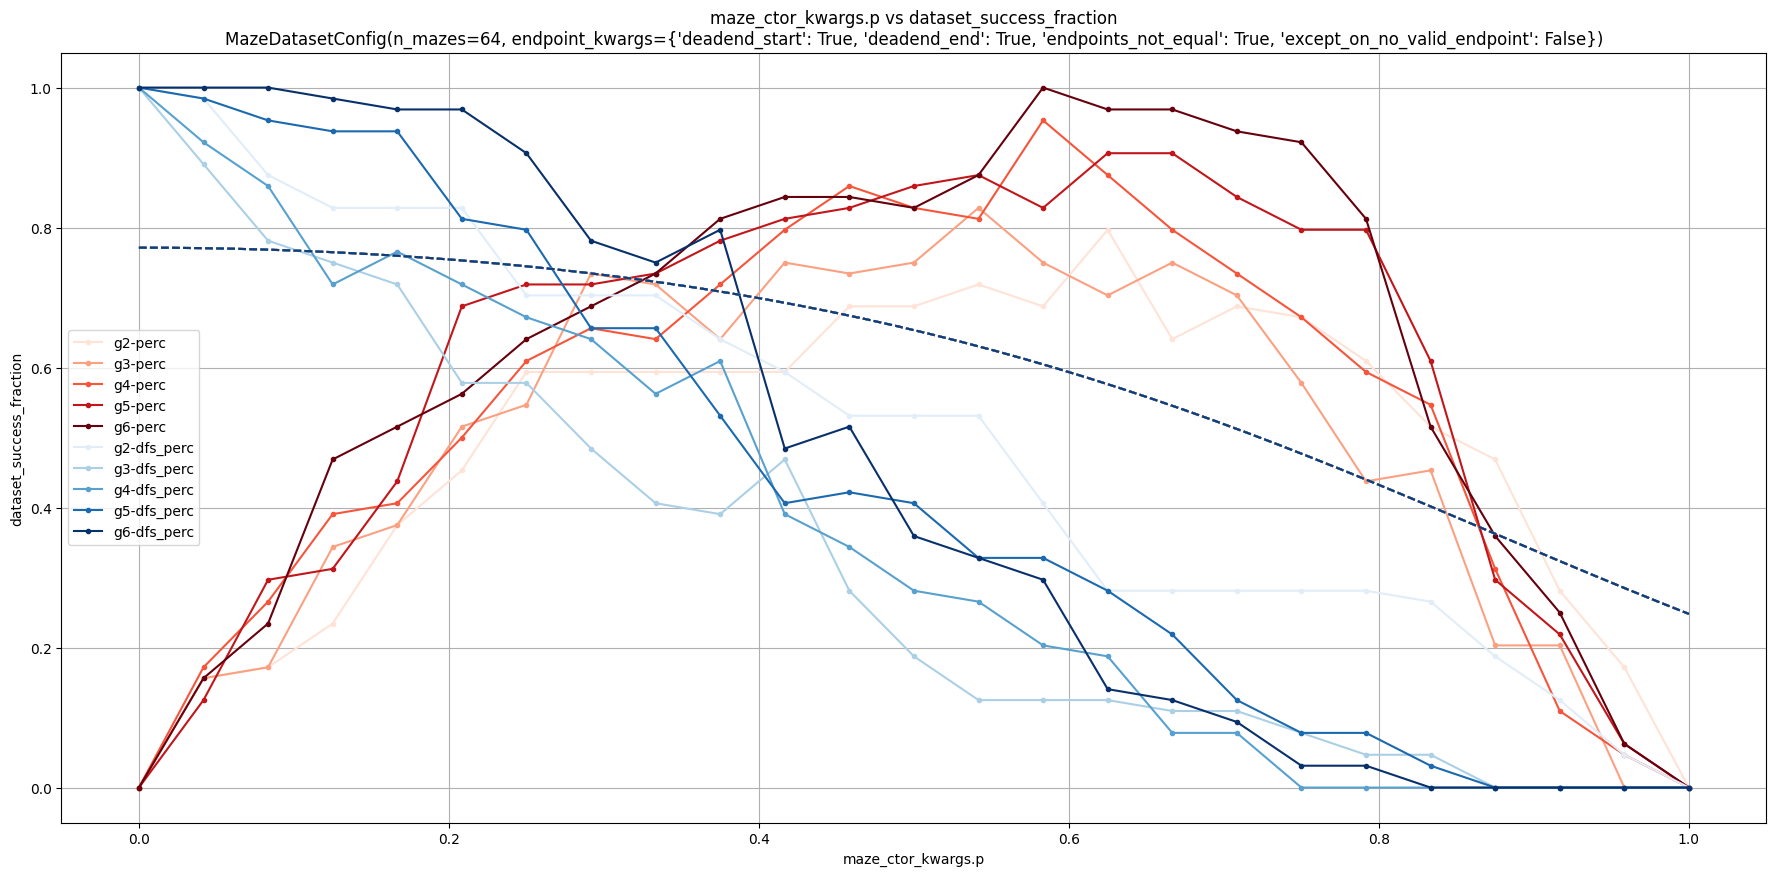

In [7]:
DATA_PATH_DIR: Path = Path("../docs/benchmarks/percolation_fractions/")
# DATA_PATH: str = DATA_PATH_DIR / "large/result-n256-c54-p100.zanj"
# DATA_PATH: str = DATA_PATH_DIR / "medium/result-n128-c42-p50.zanj"
DATA_PATH: str = DATA_PATH_DIR / "small/result-n64-c30-p25.zanj"
# DATA_PATH: str = DATA_PATH_DIR / "test/result-n16-c12-p16.zanj"

sweep_fit(
    DATA_PATH,
    Path("../docs/benchmarks/percolation_fractions/fit_plots/"),
    niterations=10,
)

# interactive plots for figuring out `maze_dataset.math.soft_step()`

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from ipywidgets import FloatSlider, HBox, VBox, Layout
import ipywidgets as widgets
from maze_dataset.math import soft_step


def create_interactive_plot(heatmap: bool = True) -> None:
    """
    Create an interactive plot with the specified grid layout

    # Parameters:
     - `heatmap : bool`
        Whether to show heatmaps (defaults to `True`)
    """

    # Create sliders with better layout
    x_slider = FloatSlider(
        min=0.0,
        max=1.0,
        step=0.01,
        value=0.5,
        description="x:",
        style={"description_width": "30px"},
        layout=Layout(width="98%"),
    )

    p_slider = FloatSlider(
        min=0.0,
        max=1.0,
        step=0.01,
        value=0.5,
        description="p:",
        style={"description_width": "30px"},
        layout=Layout(width="98%"),
    )

    alpha_slider = FloatSlider(
        min=0.1,
        max=30.0,
        step=0.1,
        value=10.0,
        description="α:",
        style={"description_width": "30px"},
        layout=Layout(width="98%"),
    )

    w_slider = FloatSlider(
        min=0.0,
        max=20,
        step=0.5,
        value=4.0 / 7.0,
        description="w:",
        style={"description_width": "30px"},
        layout=Layout(width="98%"),
    )

    # Slider layout control
    slider_box = VBox(
        [
            widgets.Label("Adjust parameters:"),
            HBox(
                [x_slider, w_slider],
                layout=Layout(width="100%", justify_content="space-between"),
            ),
            HBox(
                [p_slider, alpha_slider],
                layout=Layout(width="100%", justify_content="space-between"),
            ),
        ]
    )

    def update_plot(x: float, p: float, alpha: float, w: float) -> None:
        """
        Update the plot with current slider values

        # Parameters:
         - `x : float`
            x value
         - `p : float`
            p value
         - `k : float`
            k value
         - `alpha : float`
            alpha value
        """

        # Set up the figure and grid - now 2x2 grid
        fig = plt.figure(figsize=(14, 10))
        gs = GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

        # Create x and p values focused on [0,1] range
        xs = np.linspace(0.0, 1.0, 500)
        ps = np.linspace(0.0, 1.0, 500)

        # Plot 1: f(x) vs x (top left)
        ax1 = fig.add_subplot(gs[0, 0])
        ys = soft_step(xs, p, alpha, w)
        ax1.plot(xs, ys, "b-", linewidth=2.5)

        # Add guidelines
        ax1.axvline(x=p, color="red", linestyle="--", alpha=0.7, label=f"p = {p:.2f}")
        ax1.axvline(x=w, color="green", linestyle="--", alpha=0.7, label=f"w = {w:.2f}")
        ax1.axvline(x=x, color="blue", linestyle=":", alpha=0.7, label=f"x = {x:.2f}")

        # Add identity line for reference
        ax1.plot(xs, xs, "k--", alpha=0.3, label="f(x) = x")

        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.set_xlabel("x")
        ax1.set_ylabel("f(x)")
        ax1.set_title(f"f(x) with p={p:.2f}, w={w:.2f}, α={alpha:.1f}")
        ax1.grid(True, alpha=0.3)
        ax1.legend(loc="best")

        # Plot 2: f(p) vs p with fixed x (top right)
        ax2 = fig.add_subplot(gs[0, 1])

        # Plot the main curve with current x value
        f_p_values = np.array([soft_step(x, p_val, alpha, w) for p_val in ps])
        ax2.plot(ps, f_p_values, "blue", linewidth=2.5, label=f"x = {x:.2f}")

        # Create additional curves for different x values
        x_values = [0.2, 0.4, 0.6, 0.8]
        colors = ["purple", "orange", "magenta", "green"]

        for x_val, color in zip(x_values, colors):
            if abs(x_val - x) > 0.05:  # Don't draw if too close to current x
                f_p_values = np.array(
                    [soft_step(x_val, p_val, alpha, w) for p_val in ps]
                )
                ax2.plot(
                    ps,
                    f_p_values,
                    color=color,
                    linewidth=1.5,
                    alpha=0.4,
                    label=f"x = {x_val}",
                )

        # Add guideline for current p value
        ax2.axvline(x=p, color="red", linestyle="--", alpha=0.7)

        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.set_xlabel("p")
        ax2.set_ylabel("f(x,p)")
        ax2.set_title(f"f(x,p) for fixed x={x:.2f}, w={w:.2f}, α={alpha:.1f}")
        ax2.grid(True, alpha=0.3)
        ax2.legend(loc="best")

        if heatmap:
            # Plot 3: Heatmap of f(x,p) (bottom left)
            ax3 = fig.add_subplot(gs[1, 0])
            X, P = np.meshgrid(xs, ps)
            Z = np.zeros_like(X)

            # Calculate f(x,p) for all combinations
            for i, p_val in enumerate(ps):
                for j, x_val in enumerate(xs):
                    Z[i, j] = soft_step(x_val, p_val, alpha, w)

            c = ax3.pcolormesh(X, P, Z, cmap="viridis", shading="auto")

            # Add current parameter values as lines
            ax3.axhline(y=p, color="red", linestyle="--", label=f"p = {p:.2f}")
            ax3.axvline(x=w, color="green", linestyle="--", label=f"w = {w:.2f}")
            ax3.axvline(x=x, color="blue", linestyle="--", label=f"x = {x:.2f}")

            # Add lines for the reference x values used in the top-right plot
            for x_val, color in zip(x_values, colors):
                if abs(x_val - x) > 0.05:  # Don't draw if too close to current x
                    ax3.axvline(x=x_val, color=color, linestyle=":", alpha=0.4)

            # Mark the specific point corresponding to the current x and p values
            ax3.plot(x, p, "ro", markersize=8)

            ax3.set_xlabel("x")
            ax3.set_ylabel("p")
            ax3.set_title(f"f(x,p) heatmap with w={w:.2f}, α={alpha:.1f}")
            fig.colorbar(c, ax=ax3, label="f(x,p)")

            # Plot 4: NEW Heatmap of f(x,p) as function of k and alpha (bottom right)
            ax4 = fig.add_subplot(gs[1, 1])

            # Create k and alpha ranges
            ws = np.linspace(0.0, 1.0, 100)
            alphas = np.linspace(0.1, 30.0, 100)

            K, A = np.meshgrid(ws, alphas)
            Z_ka = np.zeros_like(K)

            # Calculate f(x,p) for all combinations of k and alpha
            for i, alpha_val in enumerate(alphas):
                for j, w_val in enumerate(ws):
                    Z_ka[i, j] = soft_step(x, p, alpha_val, w_val)

            c2 = ax4.pcolormesh(K, A, Z_ka, cmap="plasma", shading="auto")

            # Add current parameter values as lines
            ax4.axhline(
                y=alpha, color="purple", linestyle="--", label=f"α = {alpha:.1f}"
            )
            ax4.axvline(x=w, color="green", linestyle="--", label=f"w = {w:.2f}")

            # Mark the specific point corresponding to the current w and alpha values
            ax4.plot(w, alpha, "ro", markersize=8)

            ax4.set_xlabel("w")
            ax4.set_ylabel("α")
            ax4.set_title(f"f(x,p) heatmap with fixed x={x:.2f}, p={p:.2f}")
            fig.colorbar(c2, ax=ax4, label="f(x,p,w,α)")

        plt.tight_layout()
        plt.show()

    # Display the interactive widget
    interactive_output = widgets.interactive_output(
        update_plot,
        {"x": x_slider, "p": p_slider, "w": w_slider, "alpha": alpha_slider},
    )

    display(VBox([slider_box, interactive_output]))


# Run the interactive visualization
create_interactive_plot(True)

In [4]:
from maze_dataset import MazeDatasetConfig, LatticeMazeGenerators


cfg = MazeDatasetConfig(
	name="test",
	grid_n=5,
	n_mazes=32,
	maze_ctor=LatticeMazeGenerators.gen_percolation,
	maze_ctor_kwargs=dict(p=0.5),
	endpoint_kwargs=dict(
		deadend_start=True,
		deadend_end=True,
		endpoints_not_equal=False,
		except_on_no_valid_endpoint=False,
	),
)

cfg.success_fraction_estimate()

np.float64(0.8773029444306795)